Project Title - Customer Segmentation with K-Means Clustering

Project Level - Entry Level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("C:\\Users\\Shrushti\\Downloads\\CustomerPurchase.csv")

In [5]:
print(df.head())

   Customer ID  Age  Gender Education   Review Purchased
0         1021   30  Female    School  Average        No
1         1022   68  Female        UG     Poor        No
2         1023   70  Female        PG     Good        No
3         1024   72  Female        PG     Good        No
4         1025   16  Female        UG  Average        No


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB
None


In [9]:
df_clean = df.select_dtypes(include=['float64', 'int64'])  

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

In [13]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

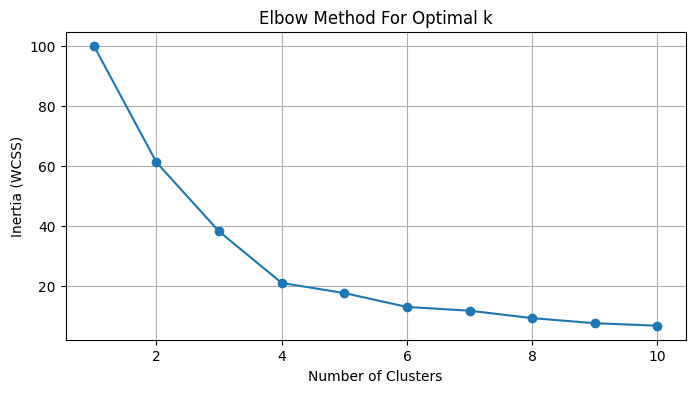

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [17]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

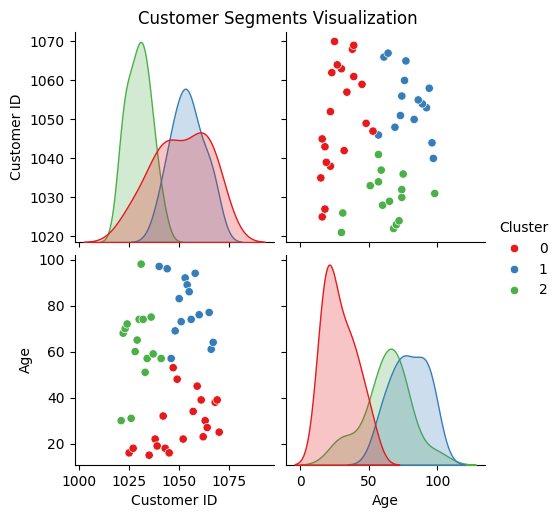

In [19]:
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.suptitle('Customer Segments Visualization', y=1.02)
plt.show()

In [20]:
numeric_columns = df.select_dtypes(include='number').columns
print(df.groupby('Cluster')[numeric_columns].mean())

         Customer ID        Age  Cluster
Cluster                                 
0            1050.75  28.950000      0.0
1            1054.20  79.200000      1.0
2            1029.80  62.733333      2.0


In [21]:
print("\nNumber of Customers in Each Cluster:")
print(df['Cluster'].value_counts())


Number of Customers in Each Cluster:
Cluster
0    20
2    15
1    15
Name: count, dtype: int64
